<a href="https://colab.research.google.com/github/diya-miriam/side-projects/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#             to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [60]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [64]:
#Get the stock quote
df= yf.download('AAPL', start='2012-01-01', end='2019-12-17')
#Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433827,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500642,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639428,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.307121,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.864159,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.031998,137310400


In [65]:
#Get the number of rows and columns in the data set
df.shape

(2002, 6)

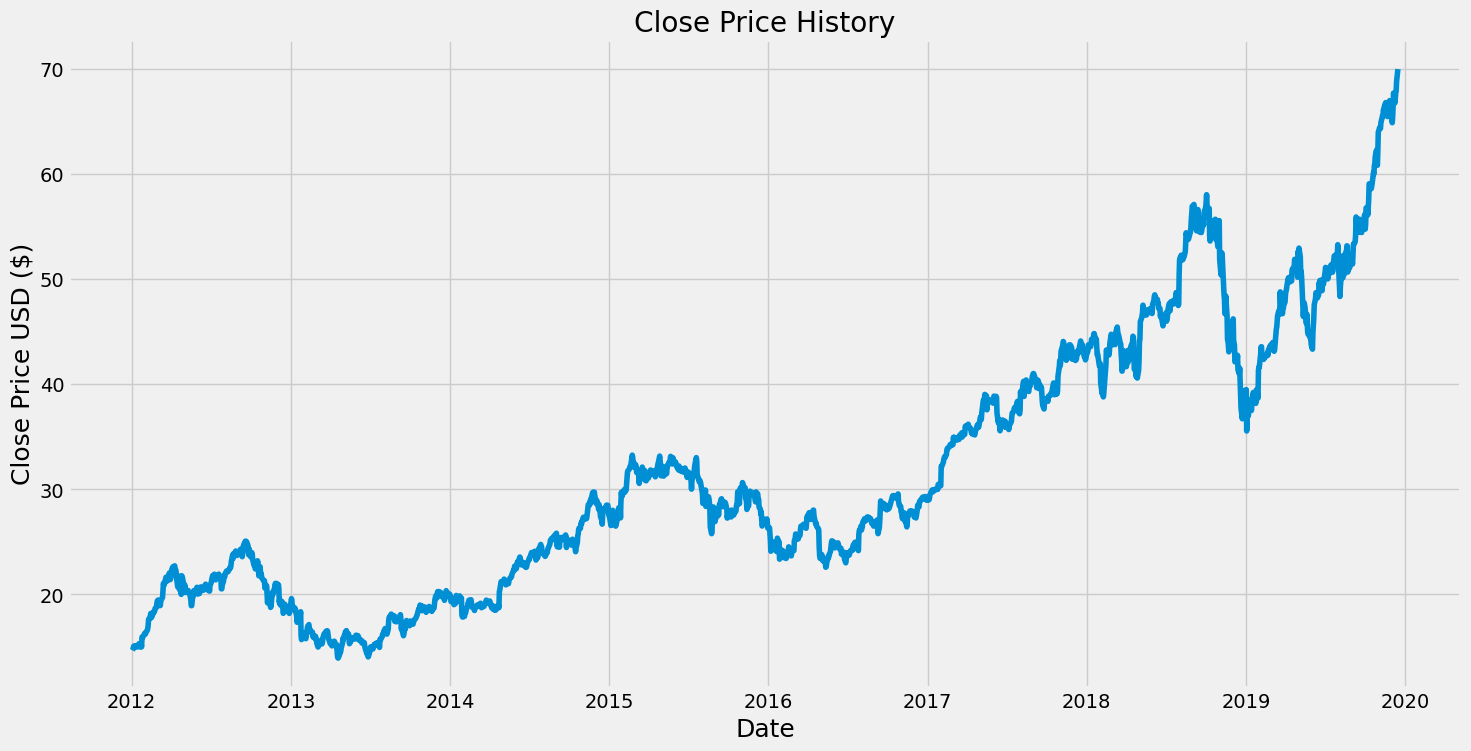

In [66]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [67]:
#Create a new dataframe with only the 'Close Column'
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

1602

In [68]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [69]:
#Create the training data set
#Create the scaled trainign data set
train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [70]:
#Covert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [71]:
#Reshape the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [72]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [73]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 48s 28ms/step - loss: 8.9131e-04


In [75]:
#Create the testing data set
#Create a new array containing scaled values from index 940 to 1000
test_data=scaled_data[training_data_len-60:, :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [76]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [77]:
#Reshape the data
#x_test.shape[0]-no of samples/rows
#x_test.shape[1]- no. of time steps/cols
#1-1 feature ie 'Close' price, converting 3 dimensinal as lstm assumes 3 dimensional models
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [78]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 14ms/step


In [79]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.710861930847168

<ipython-input-81-d5adbef8ee7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


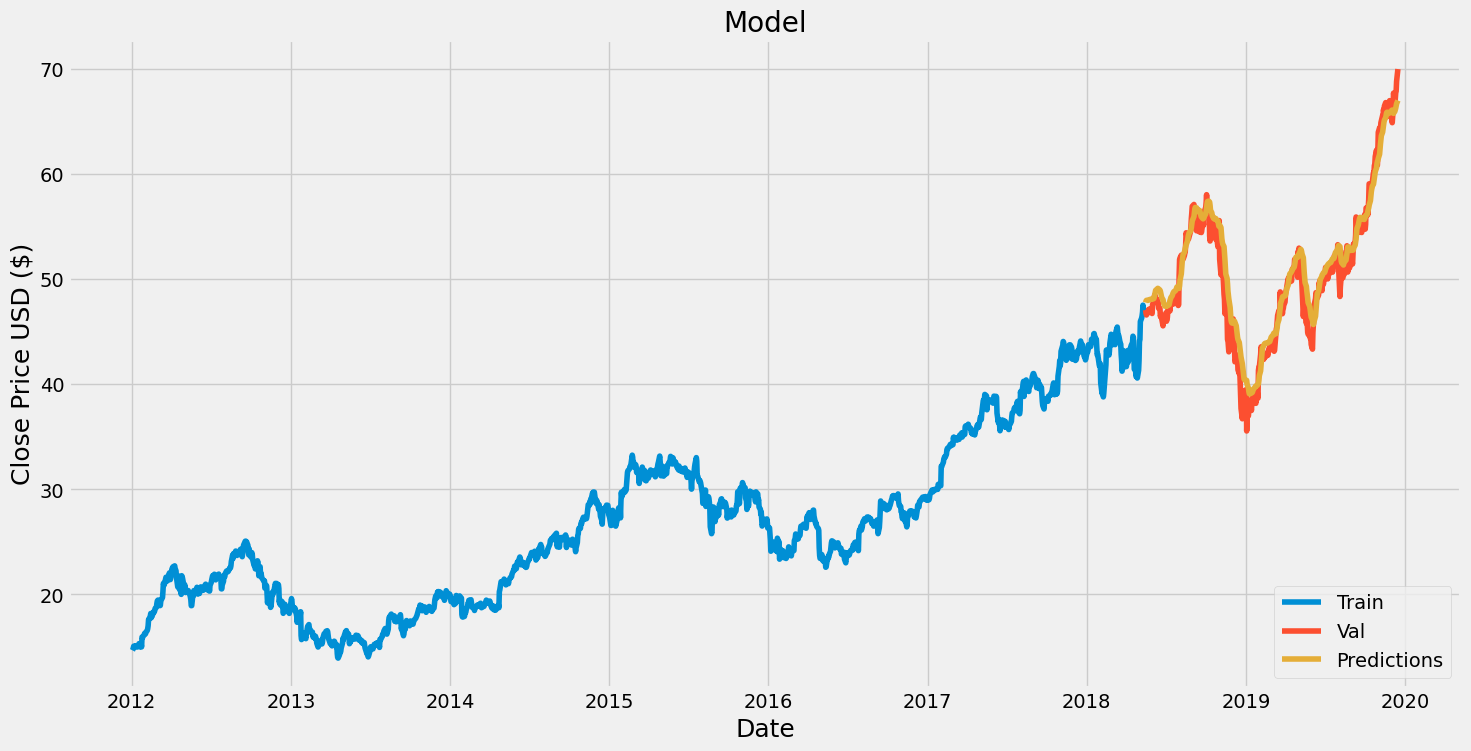

In [81]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [82]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.761276
2018-05-17,46.747501,47.906116
2018-05-18,46.577499,47.973503
2018-05-21,46.907501,47.976444
2018-05-22,46.790001,47.986702
...,...,...
2019-12-10,67.120003,66.080070
2019-12-11,67.692497,66.238029
2019-12-12,67.864998,66.447327


In [83]:
#Get the quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be valued between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 24ms/step
[[67.420654]]


In [84]:
#Get the quote
apple_quote2 = yf.download('AAPL', period='1d')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-06-14    212.490005
Name: Close, dtype: float64
